In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sweetviz
from pandas_profiling import ProfileReport

In [2]:
#Relevent ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
#ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [4]:
#Reading CSV file
dataset = pd.read_csv('EDA project - EDA project.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Name_income_type,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,Working,202500.0,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,State servant,270000.0,1508,500000.0,360.0,0.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Working,67500.0,0,200000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,Working,100000.0,2358,400000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,Working,121500.0,0,300000.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,LP001671,Female,Yes,0,Graduate,Working,135000.0,2816,600000.0,360.0,NaN,Semiurban,Y
199,LP001673,Male,No,0,Graduate,Commercial associate,108000.0,0,700000.0,360.0,1.0,Urban,N
200,LP001674,Female,Yes,1,Not Graduate,Working,146000.0,2500,800000.0,360.0,1.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,Working,67500.0,0,90000.0,360.0,0.0,Semiurban,Y


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            203 non-null    object 
 1   Gender             203 non-null    object 
 2   Married            203 non-null    object 
 3   Dependents         203 non-null    int64  
 4   Education          203 non-null    object 
 5   Name_income_type   203 non-null    object 
 6   ApplicantIncome    203 non-null    float64
 7   CoapplicantIncome  203 non-null    int64  
 8   LoanAmount         193 non-null    float64
 9   Loan_Amount_Term   195 non-null    float64
 10  Credit_History     184 non-null    float64
 11  Property_Area      203 non-null    object 
 12  Loan_Status        203 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 20.7+ KB


In [6]:
dataset.drop('Loan_ID', axis = 1,inplace = True)

In [7]:
dataset

,Gender,Married,Dependents,Education,Name_income_type,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,Working,202500.0,0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,State servant,270000.0,1508,500000.0,360.0,0.0,Rural,N
2,Male,Yes,0,Graduate,Working,67500.0,0,200000.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,Working,100000.0,2358,400000.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,Working,121500.0,0,300000.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
198,Female,Yes,0,Graduate,Working,135000.0,2816,600000.0,360.0,NaN,Semiurban,Y
199,Male,No,0,Graduate,Commercial associate,108000.0,0,700000.0,360.0,1.0,Urban,N
200,Female,Yes,1,Not Graduate,Working,146000.0,2500,800000.0,360.0,1.0,Semiurban,Y
201,Male,No,2,Graduate,Working,67500.0,0,90000.0,360.0,0.0,Semiurban,Y


##### There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

let's find these categorical columns having these 'XNA' values
    
For Gender column

In [8]:
dataset['Gender'].value_counts()

Male      155
Female     39
XNA         9
Name: Gender, dtype: int64

###### Since, Male is having the majority and only 9 rows are having NA values, we can update those columns with Gender 'Male' as there will be no impact on the dataset.

Updating the column 'Gender' with the help of mapping

In [9]:
dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0,'XNA':1})

In [10]:
dataset['Education'] = dataset['Education'].map({'Graduate':1,'Not Graduate':0})

In [11]:
dataset['Married'] = dataset['Married'].map({'Yes':1,'No':0})

In [12]:
dataset['Property_Area'] = dataset['Property_Area'].map({'Urban':1,'Semiurban':2,'Rural':3})

In [13]:
dataset['Name_income_type'] = dataset['Name_income_type'].map({'Student':0,'Working':1,'State servant':2,'Commercial associate':3,'Pensioner':4})

In [14]:
dataset['Gender'].value_counts()

1    164
0     39
Name: Gender, dtype: int64

In [15]:
dataset['Education'].value_counts()

1    163
0     40
Name: Education, dtype: int64

In [16]:
dataset['Married'].value_counts()

1    122
0     81
Name: Married, dtype: int64

In [17]:
dataset['Property_Area'].value_counts()

1    121
3     44
2     38
Name: Property_Area, dtype: int64

In [18]:
dataset['Name_income_type'].value_counts()

1    107
3     54
0     27
2     14
4      1
Name: Name_income_type, dtype: int64

In [19]:
dataset

,Gender,Married,Dependents,Education,Name_income_type,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,1,202500.0,0,NaN,360.0,1.0,1,Y
1,1,1,1,1,2,270000.0,1508,500000.0,360.0,0.0,3,N
2,1,1,0,1,1,67500.0,0,200000.0,360.0,1.0,1,Y
3,1,1,0,0,1,100000.0,2358,400000.0,360.0,1.0,1,Y
4,1,0,0,1,1,121500.0,0,300000.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,1,0,1,1,135000.0,2816,600000.0,360.0,NaN,2,Y
199,1,0,0,1,3,108000.0,0,700000.0,360.0,1.0,1,N
200,0,1,1,0,1,146000.0,2500,800000.0,360.0,1.0,2,Y
201,1,0,2,1,1,67500.0,0,90000.0,360.0,0.0,2,Y


For Dependents column

Since these column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, Hence Median comes to rescue for this and we will fill those missing blanks with median value

Filling missing values with median


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


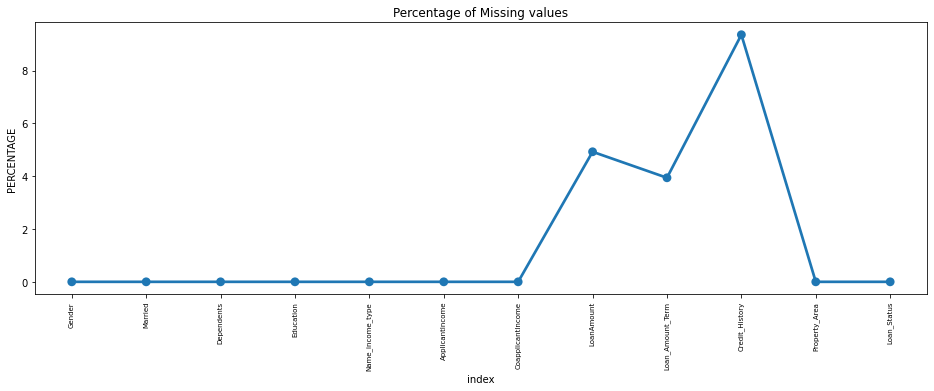

In [20]:
missing = pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [21]:
values= dataset['LoanAmount'].median()
dataset.loc[dataset['LoanAmount'].isnull(),'LoanAmount']=values
values= dataset['Credit_History'].median()
dataset.loc[dataset['Credit_History'].isnull(),'Credit_History']=values
values= dataset['Loan_Amount_Term'].median()
dataset.loc[dataset['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=values

In [22]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Name_income_type     0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
dataset.groupby(['Gender','Married','Education']).size().reset_index().rename(columns={0:'counts'})

,Gender,Married,Education,counts
0,0,0,0,2
1,0,0,1,18
2,0,1,0,3
3,0,1,1,16
4,1,0,0,9
5,1,0,1,52
6,1,1,0,26
7,1,1,1,77


Columns having null values

###### Now, all columns have been with zero null values

In [24]:
dataset

,Gender,Married,Dependents,Education,Name_income_type,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,1,202500.0,0,500000.0,360.0,1.0,1,Y
1,1,1,1,1,2,270000.0,1508,500000.0,360.0,0.0,3,N
2,1,1,0,1,1,67500.0,0,200000.0,360.0,1.0,1,Y
3,1,1,0,0,1,100000.0,2358,400000.0,360.0,1.0,1,Y
4,1,0,0,1,1,121500.0,0,300000.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,1,0,1,1,135000.0,2816,600000.0,360.0,1.0,2,Y
199,1,0,0,1,3,108000.0,0,700000.0,360.0,1.0,1,N
200,0,1,1,0,1,146000.0,2500,800000.0,360.0,1.0,2,Y
201,1,0,2,1,1,67500.0,0,90000.0,360.0,0.0,2,Y


## Categorical Analysis


Rejected Loan is 33 % of total
Accepted loan  is 67 % of total


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loan_Status')

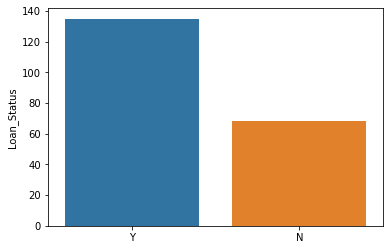

In [55]:
print('Rejected Loan is {} % of total'.format(round(dataset['Loan_Status'].value_counts()['N']/len(dataset['Loan_Status'])*100)))
print('Accepted loan  is {} % of total'.format(round(dataset['Loan_Status'].value_counts()['Y']/len(dataset['Loan_Status'])*100)))
x=dataset.Loan_Status.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('Loan_Status')

In [26]:
categorical_columns = [ 'Gender', 'Married', 'Dependents','Education','Name_income_type', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

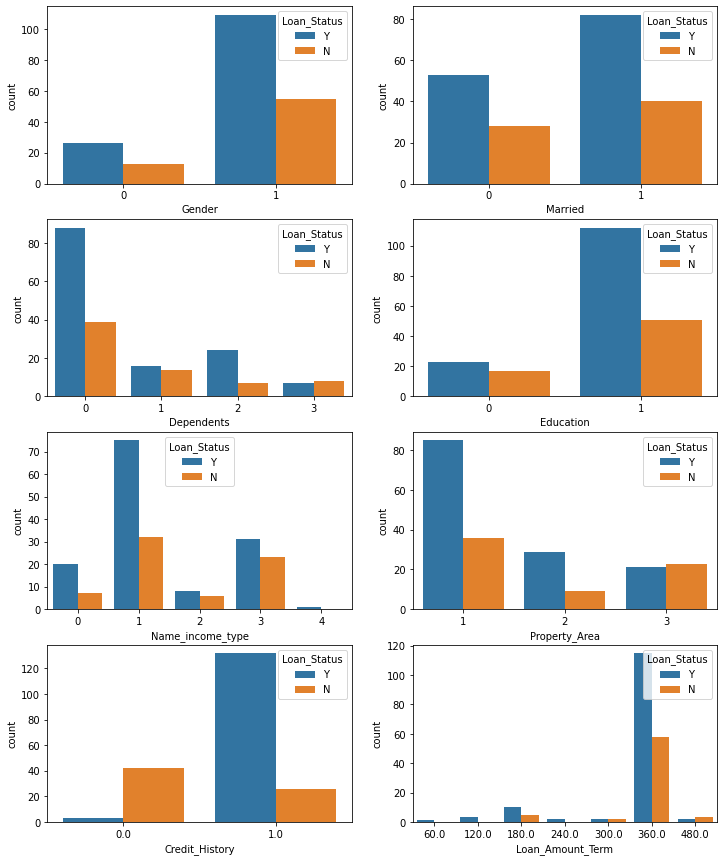

In [27]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=dataset,hue='Loan_Status',ax=axes[row,col])

* Most clients are married. Single people have higher chances of defaulting than others and are from Urban areas.
* The working class applies the most for loans, and have a very low default rate, hence they are reliable.
* commercial associates, state servants and pensioners are fairly more reliable.

In [28]:
dataset.describe()

,Gender,Married,Dependents,Education,Name_income_type,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.807882,0.600985,0.674877,0.802956,1.482759,153899.429335,1644.305419,467832.512315,342.266010,0.778325,1.620690
std,0.394939,0.490906,0.986397,0.398749,1.040491,76840.388875,2056.083566,223226.190679,62.937877,0.416400,0.819904
min,0.000000,0.000000,0.000000,0.000000,0.000000,38419.155000,0.000000,80000.000000,60.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,108000.000000,0.000000,300000.000000,360.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,135000.000000,1280.000000,500000.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,3.000000,180000.000000,2432.500000,650000.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,4.000000,540000.000000,11300.000000,800000.000000,480.000000,1.000000,3.000000




#### let's see how Credit_History affects Loan_Status


In [29]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,42,3,45
1.0,26,132,158
All,68,135,203




We can clearly see that applicants with Credit_History 1 are more eligible to get a loan more then those who have Credit_History=0

 Let's explore some variables of our dataset by visualizing them!


<AxesSubplot:>

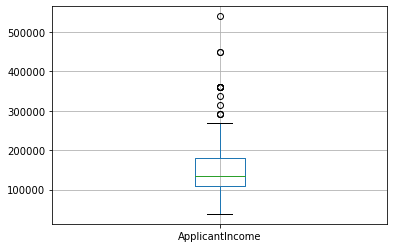

In [30]:
dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

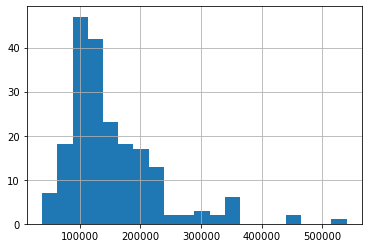

In [31]:
dataset['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

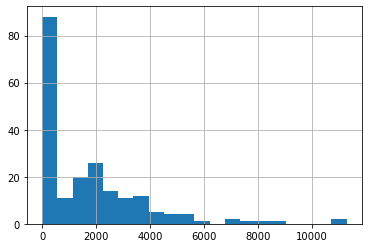

In [32]:
dataset['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

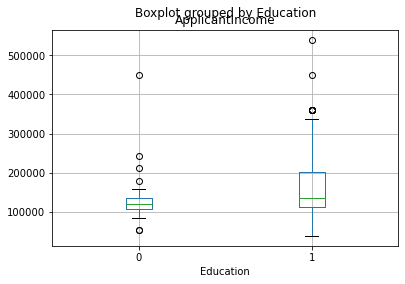

In [33]:
dataset.boxplot(column='ApplicantIncome', by='Education')



We can see that there's no big difference, that means income does not vary very much but cearly some of the applicants have higher incomes as compared to not Graduate

Let's explore  among variables

<AxesSubplot:>

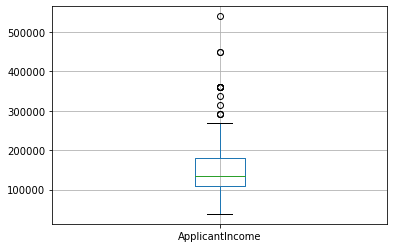

In [34]:
dataset.boxplot(column='ApplicantIncome')

most of our variables have outliers that needs to worked on

<AxesSubplot:>

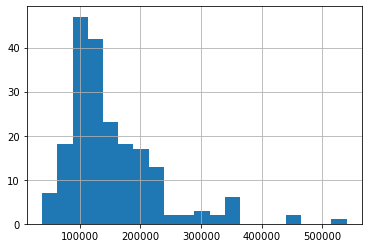

In [35]:
dataset['ApplicantIncome'].hist(bins=20)

As you can see that ApplicantIncome is positively skewed, Let's normalize it!

<AxesSubplot:>

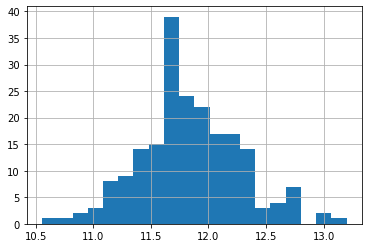

In [36]:
dataset['ApplicantIncome_log']=np.log(dataset['ApplicantIncome'])
dataset['ApplicantIncome_log'].hist(bins=20)

After applying the log function data looks more normalized !

In [37]:
dataset

,Gender,Married,Dependents,Education,Name_income_type,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log
0,1,0,0,1,1,202500.0,0,500000.0,360.0,1.0,1,Y,12.218495
1,1,1,1,1,2,270000.0,1508,500000.0,360.0,0.0,3,N,12.506177
2,1,1,0,1,1,67500.0,0,200000.0,360.0,1.0,1,Y,11.119883
3,1,1,0,0,1,100000.0,2358,400000.0,360.0,1.0,1,Y,11.512925
4,1,0,0,1,1,121500.0,0,300000.0,360.0,1.0,1,Y,11.707670
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,1,0,1,1,135000.0,2816,600000.0,360.0,1.0,2,Y,11.813030
199,1,0,0,1,3,108000.0,0,700000.0,360.0,1.0,1,N,11.589887
200,0,1,1,0,1,146000.0,2500,800000.0,360.0,1.0,2,Y,11.891362
201,1,0,2,1,1,67500.0,0,90000.0,360.0,0.0,2,Y,11.119883


# Machine learning models

### First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Loan_Status the target value we want to predict.

### Models we will use:

    Decision Tree
    Random Forest
    Logistic Regression

### The Process of Modeling the Data:

    Importing the model
    Fitting the model
    Predicting Loan Status
    Classification report by Loan Status
    Overall accuracy



### Decision Tree

In [38]:
y = dataset['Loan_Status']
X = dataset.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           N       0.71      0.65      0.68        23
           Y       0.80      0.84      0.82        38

    accuracy                           0.77        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.77      0.77      0.77        61

77.05% Accurate


### Random Forest


In [40]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           N       0.92      0.52      0.67        23
           Y       0.77      0.97      0.86        38

    accuracy                           0.80        61
   macro avg       0.85      0.75      0.76        61
weighted avg       0.83      0.80      0.79        61

80.33% Accurate


### Logistic Regression


In [41]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        23
           Y       0.62      1.00      0.77        38

    accuracy                           0.62        61
   macro avg       0.31      0.50      0.38        61
weighted avg       0.39      0.62      0.48        61

accuracy is 0.6229508196721312


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
### To Create the Simple report quickly
#####TYPE THIS CODE FOR LAST
profile = ProfileReport(dataset, title='Analysis Report', explorative=True)

In [43]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
profile.to_file("Analysis Report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Conclusion

    * Most clients are married. Single people have higher chances of defaulting than others and are from Urban areas.
    * The working class applies the most for loans, and have a very low default rate, hence they are reliable.
    * commercial associates, state servants and pensioners are fairly more reliable.

    Bascially all the features are very important variables because of its high correlation with Loan_Status.
    The Random Forest algorithm is the most accurate: approximately 82%.
